In [6]:
import numpy as np
import pandas as pd
import os
from functools import partial
π=np.pi

import matplotlib.pyplot as plt
plt.ion()

import seaborn as sns
sns.set(context='notebook',
        style='ticks',
        font_scale=1,
        rc={'axes.grid':True,
            'grid.color':'.9',
            'grid.linewidth':0.75})

In [7]:
def gaussian_propensity(Δt=1/100.,N=50,ω=4,σ0=25,μ0=50,s=42):
    np.random.seed(s)
    T=int(1/Δt)  
    t=np.linspace(0,1,T) 
    μ=np.random.normal(0,1/np.sqrt(Δt),size=t.shape);μ=np.cumsum(μ); # brownian motion
    μ += μ0*np.sin(ω*2*π*t) # draft
    σ=σ0*np.abs(np.sin(μ)) # diffusion
    x=μ.reshape(T,1)+σ.reshape(T,1)*np.random.randn(len(μ),N);

    import itertools
    idx=np.array(list(itertools.combinations(np.arange(T),2)))
    d1=dict(
            t1=np.repeat(t[idx[:,0]],N),
            t2=np.repeat(t[idx[:,1]],N),
            x=x[idx[:,0]].reshape(-1),
            y=np.zeros(len(idx)*N).astype(int))
    d2=dict(
            t1=np.repeat(t[idx[:,0]],N),
            t2=np.repeat(t[idx[:,1]],N),
            x=x[idx[:,1]].reshape(-1),
            y=np.ones(len(idx)*N).astype(int))
    d=pd.DataFrame(d1);d=pd.concat((d,pd.DataFrame(d2)));

    import statsmodels.formula.api as sm
    m=sm.logit(formula='y~x+t1+t2+x:t1+x:t2+t1:t2+I(x**2)+I(t1**2)+I(t2**2)+x:t1:t2',
            data=d).fit_regularized()
    print(m.summary2())

    fig=plt.figure(1);plt.clf();
    ax1=fig.add_subplot(111);
    ax2=ax1.twinx()
    ax1.scatter(np.repeat(t,N),x.reshape(-1),s=10)
    ax1.plot(t,μ,'k-',lw=2)
    ax1.set_ylabel('x(t)')

    e=dict(t1=np.repeat(t,N),t2=t[-1]*np.ones(T*N),
            x=x.reshape(-1),y=np.zeros(T*N))
    e=pd.DataFrame(e)
    ax2.scatter(e['t1'],m.predict(e),
            s=3,c='r',
            label='ω(x,t,T)')
    ax2.set_ylabel('ω(x,t,T)')

    e=dict(t1=np.repeat(t[:T//2],N),t2=t[T//2]*np.ones(T//2*N),
            x=x[:T//2,:].reshape(-1),y=np.zeros(T//2*N))
    e=pd.DataFrame(e)
    ax2.scatter(e['t1'],m.predict(e),
            s=3,c='g',
            label='ω(x,t,T/2)')
    plt.legend()

/Users/ashwindesilva/miniforge3/envs/std_dl/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/ashwindesilva/miniforge3/envs/std_dl/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5294399086335122
            Iterations: 76
            Function evaluations: 91
            Gradient evaluations: 76
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.236      
Dependent Variable: y                AIC:              524167.5095
Date:               2023-04-17 12:05 BIC:              524289.7450
No. Observations:   495000           Log-Likelihood:   -2.6207e+05
Df Model:           10               LL-Null:          -3.4311e+05
Df Residuals:       494989           LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     76.0000                                       
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
Intercept

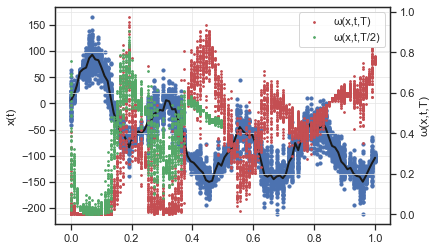

In [9]:
gaussian_propensity()